In [220]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline

In [221]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv')

In [222]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [223]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [224]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [225]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,0,0,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,0,0,0,0,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [226]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
from datetime import datetime
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries.iloc[0].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [227]:
confirmed_sum

418678

In [228]:
death_sum

18625

In [229]:
recovered_sum

9

In [230]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101794,
 105831,
 109805,
 113571,
 118602,
 125875,
 128353,
 145209,
 156104,
 167454,
 181573,
 197150,
 214909,
 242706,
 272164,
 304519,
 337089,
 378547,
 418678]

In [231]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [232]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62]])

In [233]:
world_cases

array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101794],
       [105831],
       [109805],
       [113571],
       [118602],
       [125875],
       [128353],
       [145209],
       [156104],
       [167454],
       [181573],
       [197150],
       [214909],
       [242706],
       [272164

In [234]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [235]:
total_recovered

array([[9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9],
       [9]])

In [236]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [237]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [242]:
# Convert all the integers into datetime for better visualization.
start = '1/22/2020'
start_date = datetime.datetimestrptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

AttributeError: type object 'datetime.datetime' has no attribute 'datetimestrptime'

In [215]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_dates = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-2]]

In [216]:
latest_confirmed

0       74
1      123
2      264
3      164
4        3
      ... 
236      1
237      1
238      0
239      2
240      1
Name: 3/24/20, Length: 241, dtype: int64

In [151]:
latest_dates

0       1
1       5
2      19
3       1
4       0
       ..
236     0
237     0
238     0
239     0
240     0
Name: 3/24/20, Length: 241, dtype: int64

In [152]:
latest_recoveries

0       1
1       2
2      65
3       1
4       0
       ..
237     0
238     0
239     0
240     0
241     0
Name: 3/23/20, Length: 242, dtype: int64

In [153]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [248]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [249]:
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81591 cases
Italy: 69176 cases
US: 53740 cases
Spain: 39885 cases
Germany: 32986 cases
Iran: 24811 cases
France: 22622 cases
Switzerland: 9877 cases
Korea, South: 9037 cases
United Kingdom: 8164 cases
Netherlands: 5580 cases
Austria: 5283 cases
Belgium: 4269 cases
Norway: 2863 cases
Canada: 2790 cases
Portugal: 2362 cases
Sweden: 2286 cases
Brazil: 2247 cases
Australia: 2044 cases
Israel: 1930 cases
Turkey: 1872 cases
Denmark: 1718 cases
Malaysia: 1624 cases
Czechia: 1394 cases
Ireland: 1329 cases
Japan: 1193 cases
Luxembourg: 1099 cases
Ecuador: 1082 cases
Pakistan: 972 cases
Chile: 922 cases
Poland: 901 cases
Thailand: 827 cases
Romania: 794 cases
Finland: 792 cases
Saudi Arabia: 767 cases
Greece: 743 cases
Diamond Princess: 712 cases
Indonesia: 686 cases
Iceland: 648 cases
Singapore: 558 cases
South Africa: 554 cases
Philippines: 552 cases
India: 536 cases
Qatar: 526 cases
Russia: 495 cases
Slovenia: 480 cases
Peru: 416 cases
Egypt: 402 c

In [279]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

In [280]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 39 cases
New South Wales: 818 cases
Northern Territory: 6 cases
Queensland: 397 cases
South Australia: 170 cases
Tasmania: 28 cases
Victoria: 411 cases
Western Australia: 175 cases
Alberta: 359 cases
British Columbia: 617 cases
Grand Princess: 13 cases
Manitoba: 21 cases
New Brunswick: 18 cases
Newfoundland and Labrador: 35 cases
Nova Scotia: 51 cases
Ontario: 588 cases
Prince Edward Island: 3 cases
Quebec: 1013 cases
Saskatchewan: 72 cases
Anhui: 990 cases
Beijing: 558 cases
Chongqing: 578 cases
Fujian: 318 cases
Gansu: 136 cases
Guangdong: 1428 cases
Guangxi: 254 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 319 cases
Heilongjiang: 484 cases
Henan: 1274 cases
Hong Kong: 386 cases
Hubei: 67801 cases
Hunan: 1018 cases
Inner Mongolia: 75 cases
Jiangsu: 636 cases
Jiangxi: 936 cases
Jilin: 93 cases
Liaoning: 127 cases
Macau: 25 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 249 cases
Shandong: 768 cases
Shanghai: 414 cases
Shanxi: 134 cases
Sichuan: 5

In [278]:
unique_provinces =  list(confirmed_cases['Province/State'].unique())
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

ValueError: list.remove(x): x not in list

In [254]:
nan_indices = []

for i in range (len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_cofirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

NameError: name 'province_cofirmed_cases' is not defined

AttributeError: module 'matplotlib.pyplot' has no attribute 'titles'

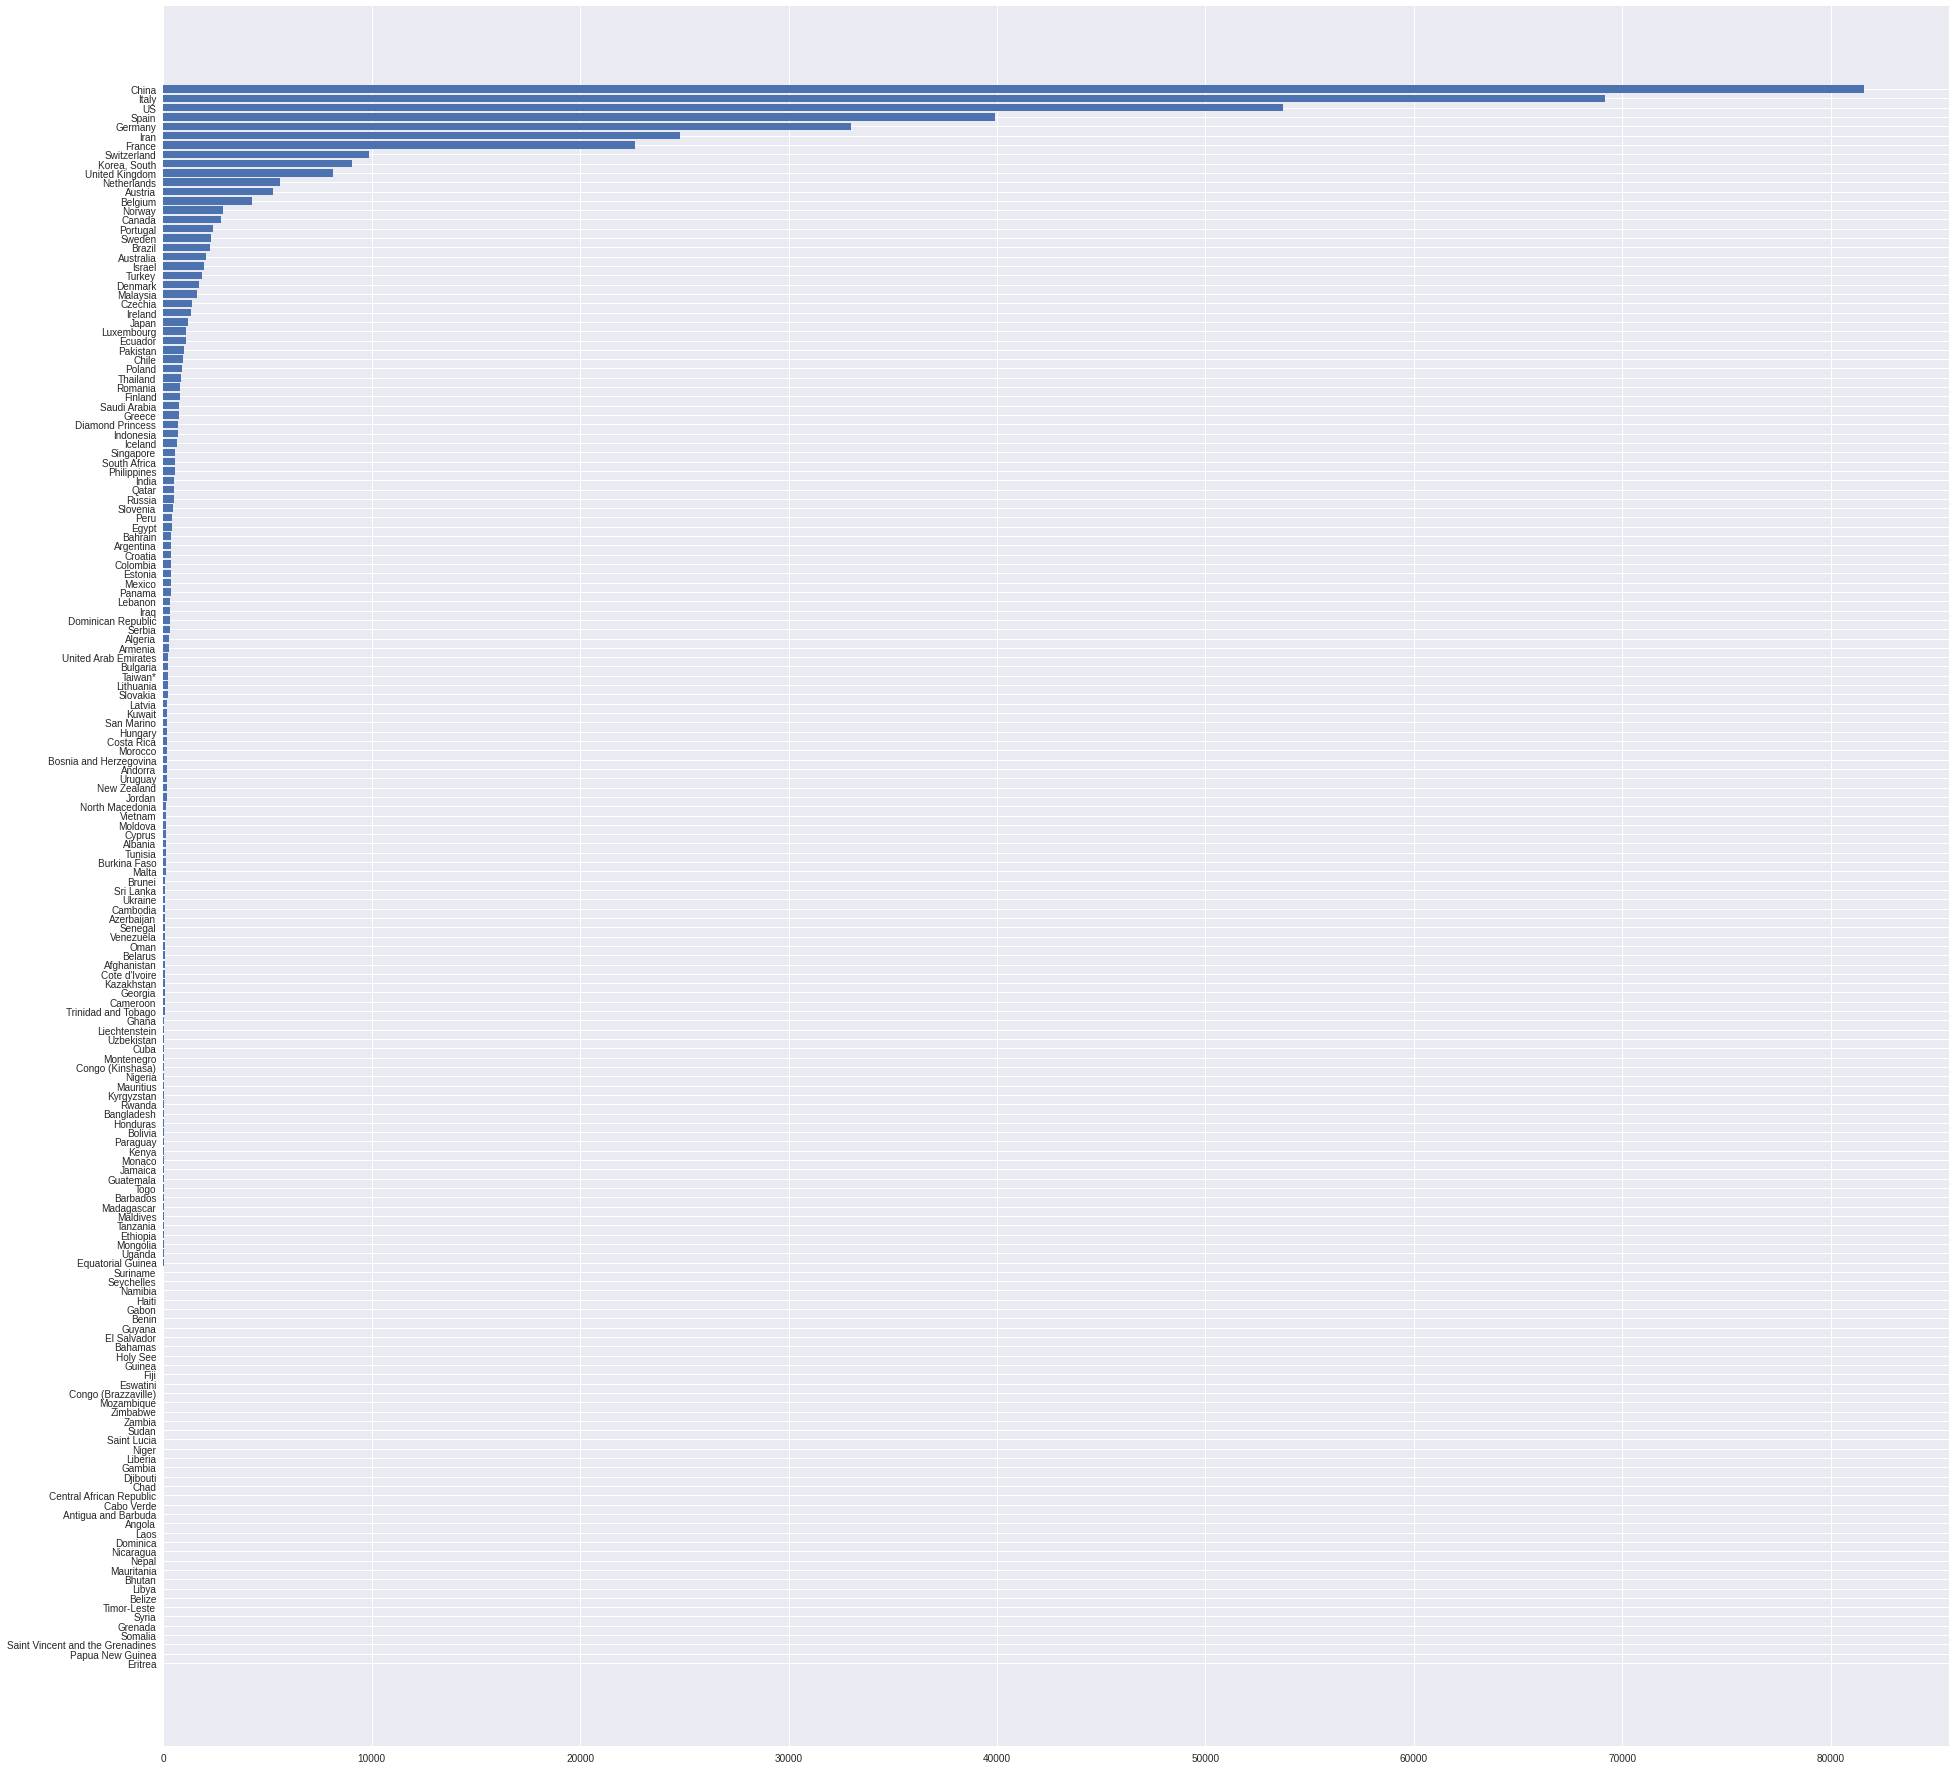

In [110]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.titles('Number of COVID-19 Confirmed Cases in Countries')
plt.xlabel('Number of COVID-19 Confirmed Cases')
plt.show()

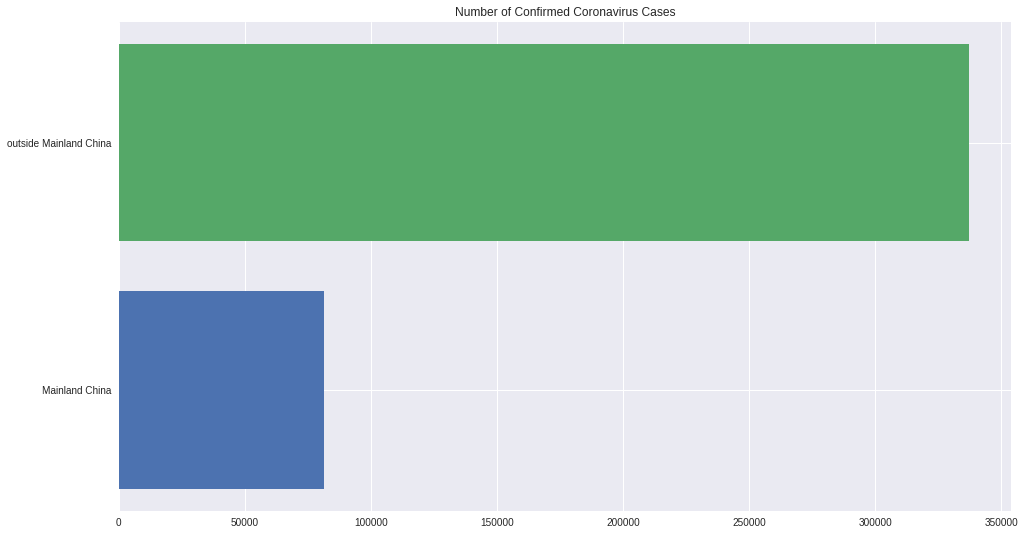

In [255]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [256]:
print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed + outside_mainland_china_confirmed))

Outside Mainland China 337087 cases
Mainland China: 81591 cases
Total: 418678 cases


In [257]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

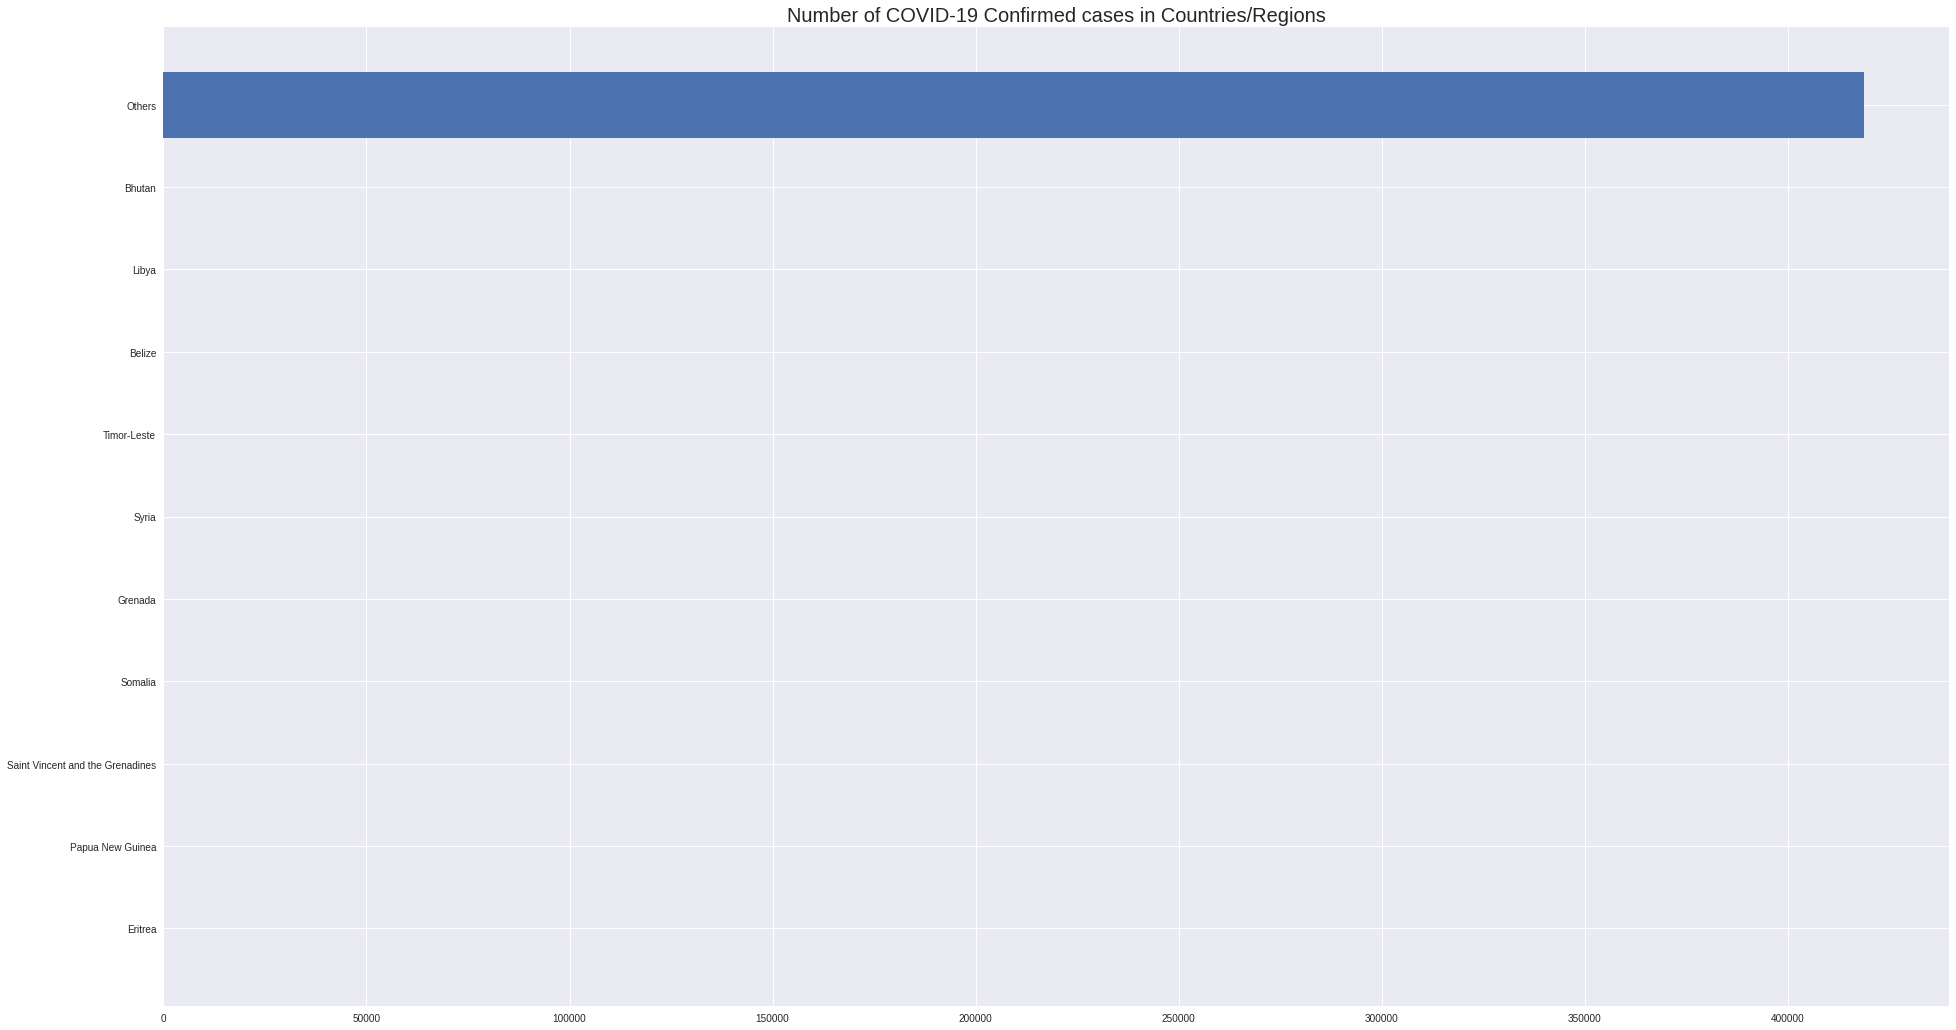

In [120]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of COVID-19 Confirmed cases in Countries/Regions', size=20)
plt.show()

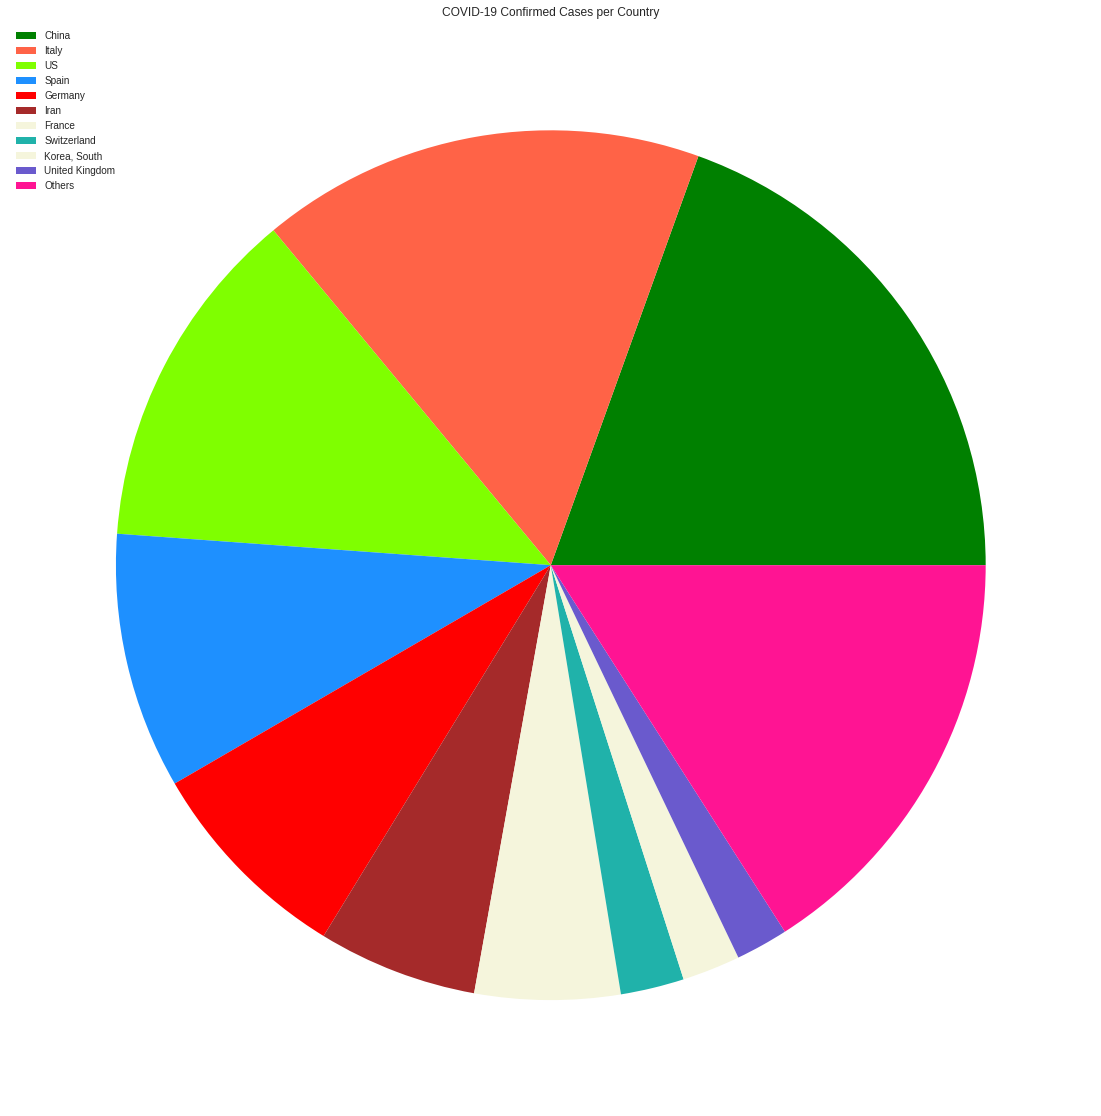

In [258]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('COVID-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [259]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [260]:
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking= [True, False]
svm_grid = {'kernel': kernel,'C': c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.4s finished
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:810: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  warnings.warn("The default of the `iid` parameter will change "
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='poly', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [261]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 1}

In [262]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [263]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [264]:
svm_pred

array([ 38894.76888719,  38895.50727857,  38900.67601823,  38914.70545445,
        38942.02593551,  38987.06780969,  39054.26142527,  39148.03713053,
        39272.82527374,  39433.0562032 ,  39633.16026717,  39877.56781395,
        40170.7091918 ,  40517.01474901,  40920.91483386,  41386.83979462,
        41919.21997959,  42522.48573703,  43201.06741523,  43959.39536247,
        44801.89992703,  45733.01145718,  46757.16030121,  47878.7768074 ,
        49102.29132402,  50432.13419937,  51872.73578171,  53428.52641932,
        55103.93646049,  56903.3962535 ,  58831.33614663,  60892.18648815,
        63090.37762635,  65430.3399095 ,  67916.50368589,  70553.2993038 ,
        73345.1571115 ,  76296.50745727,  79411.78068941,  82695.40715617,
        86151.81720585,  89785.44118673,  93600.70944708,  97602.05233519,
       101793.90019933, 106180.68338779, 110766.83224884, 115556.77713076,
       120554.94838184, 125765.77635035, 131193.69138458, 136843.1238328 ,
       142718.50404329, 1

MAE: 91158.18412696291
MSE: 12026602720.333826


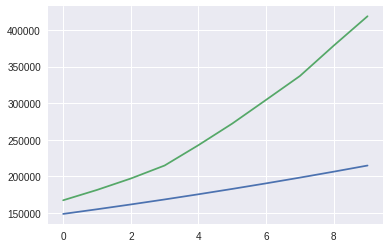

In [265]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

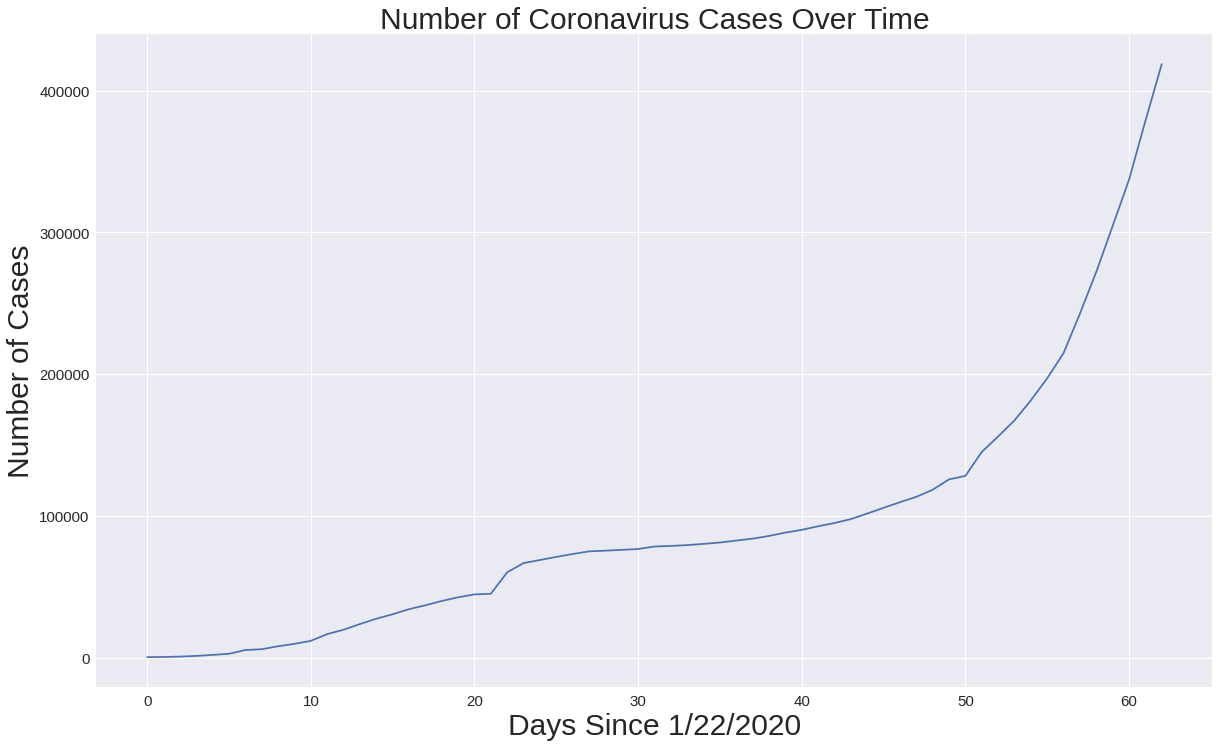

In [266]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

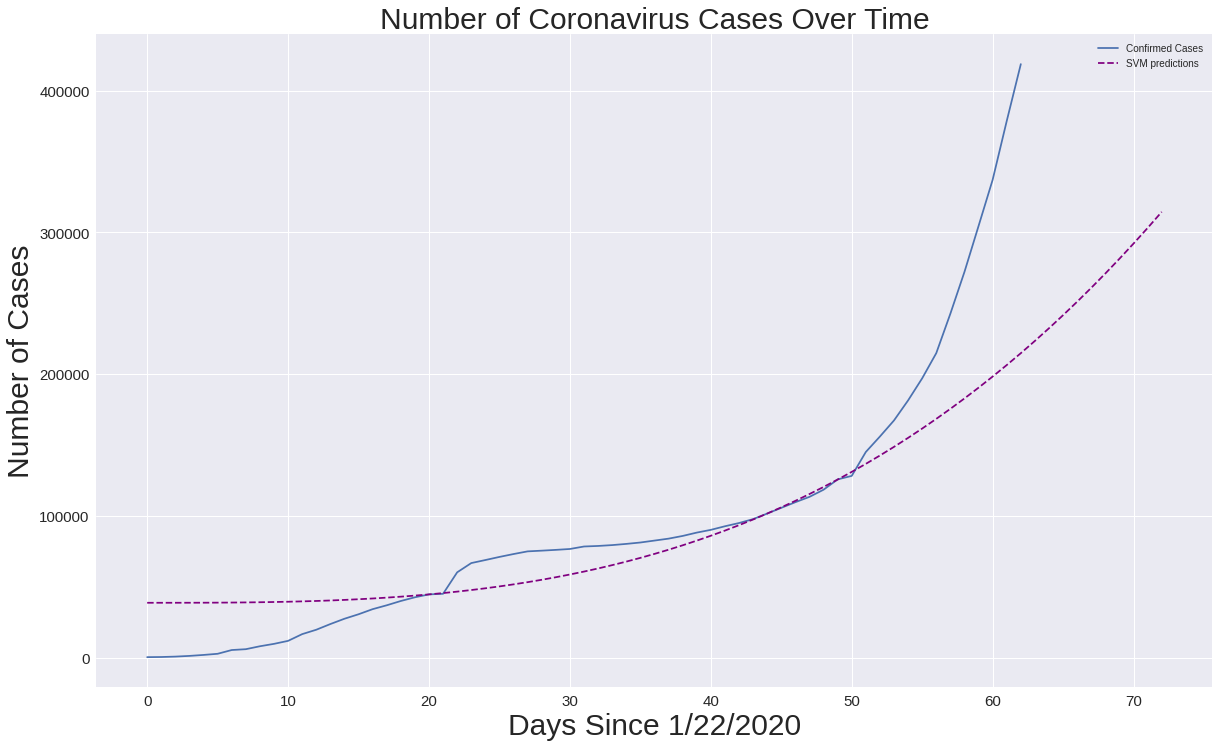

In [267]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [268]:
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


set()

In [269]:
linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 125401.33323657473
MSE: 21243364809.0951


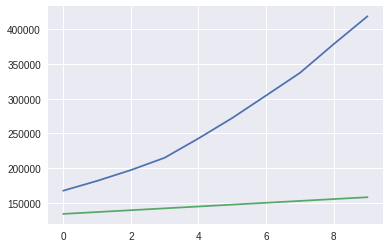

In [270]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

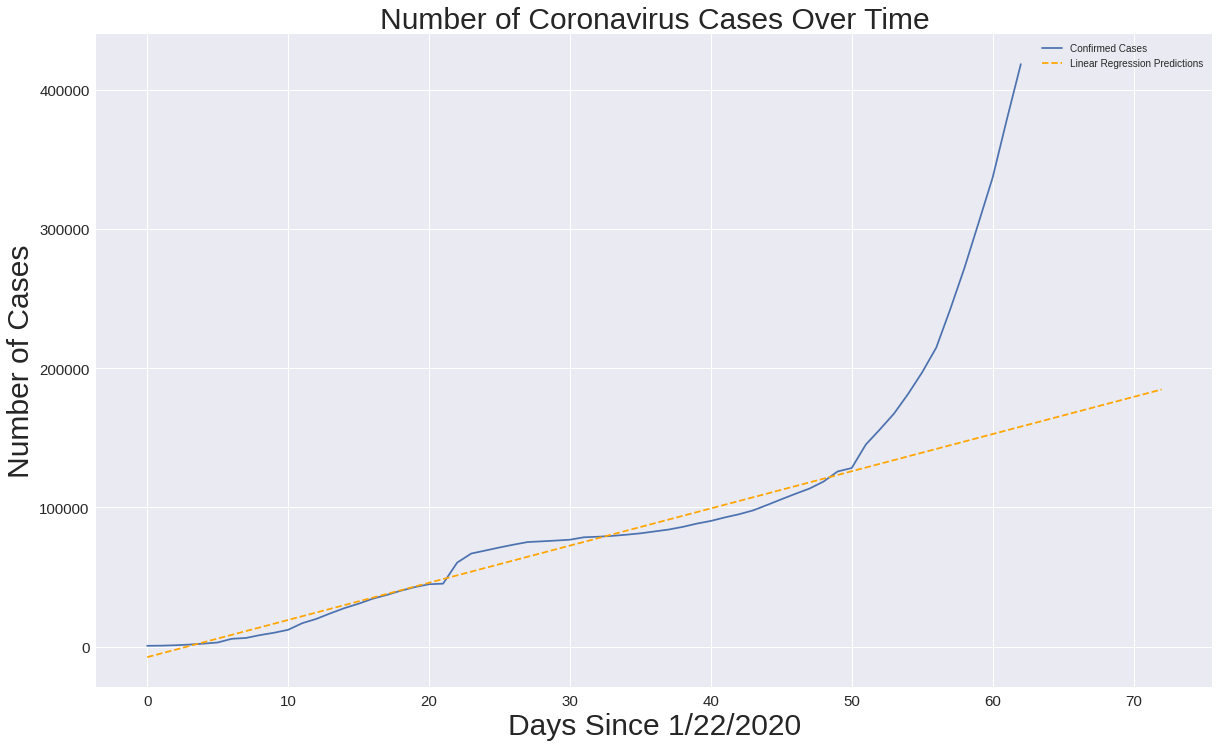

In [271]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [272]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[160777.61570714]
 [163450.35187873]
 [166123.08805031]
 [168795.8242219 ]
 [171468.56039348]
 [174141.29656507]
 [176814.03273666]
 [179486.76890824]
 [182159.50507983]
 [184832.24125141]]


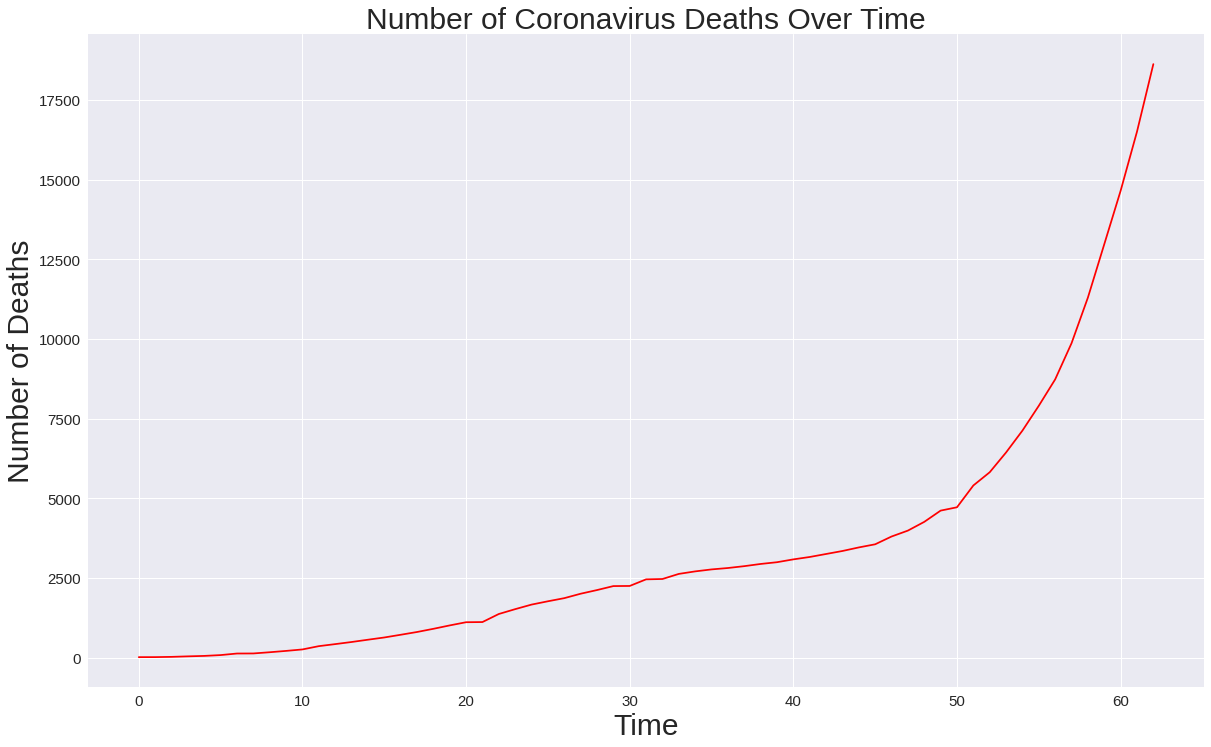

In [273]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

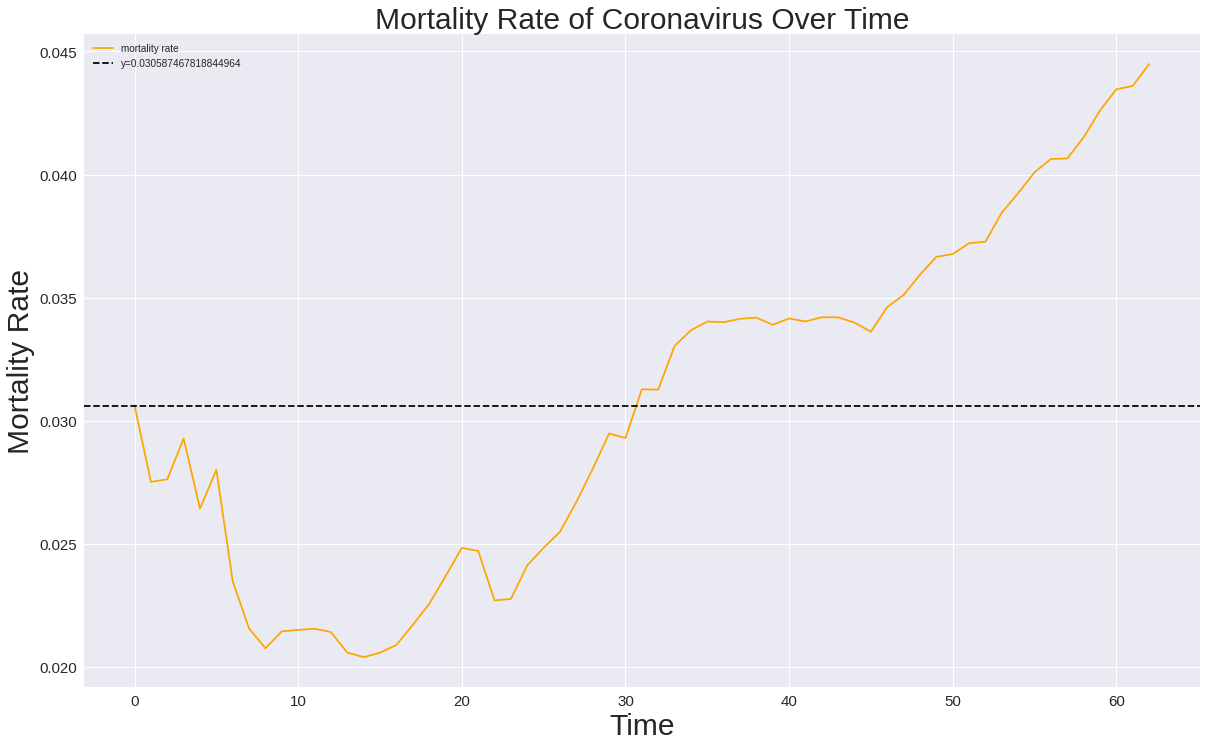

In [274]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

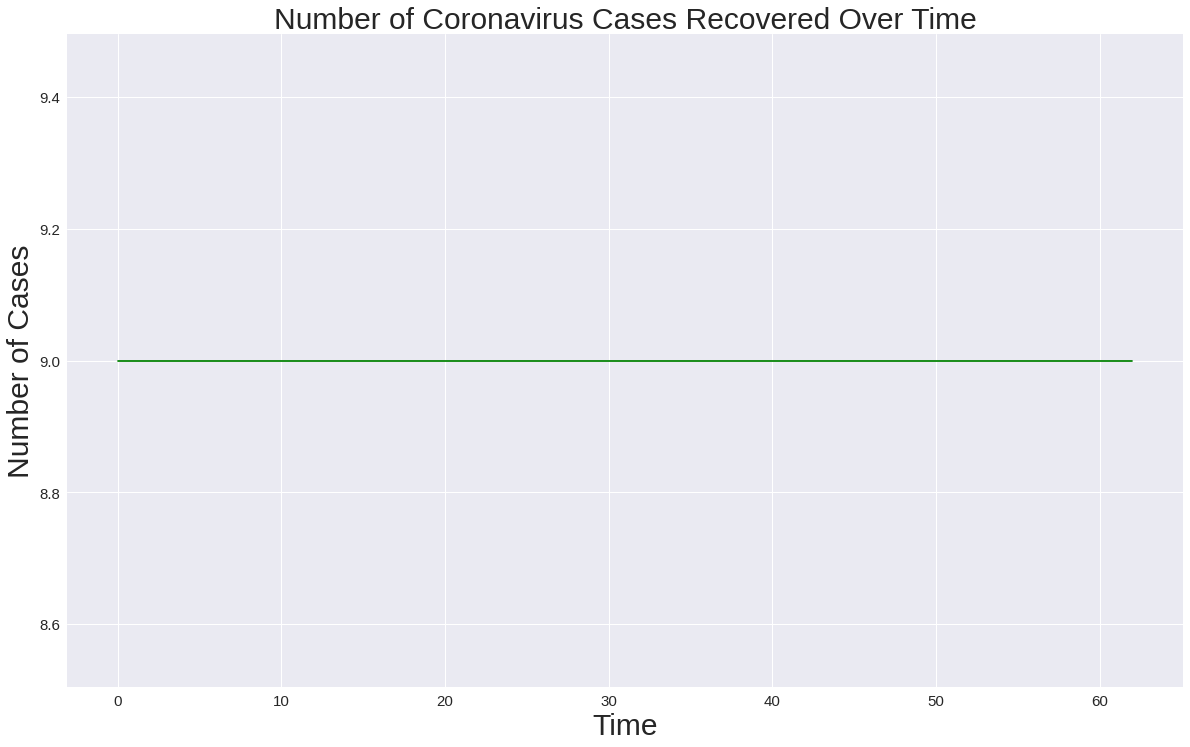

In [275]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

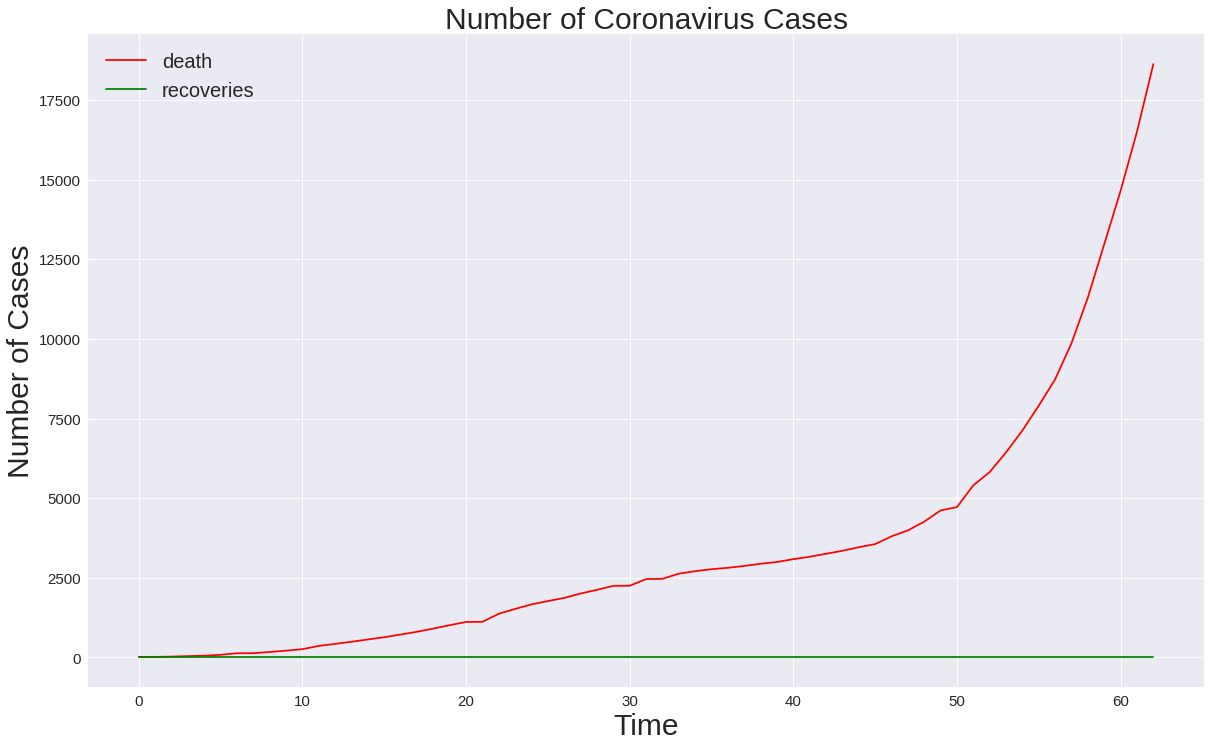

In [276]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

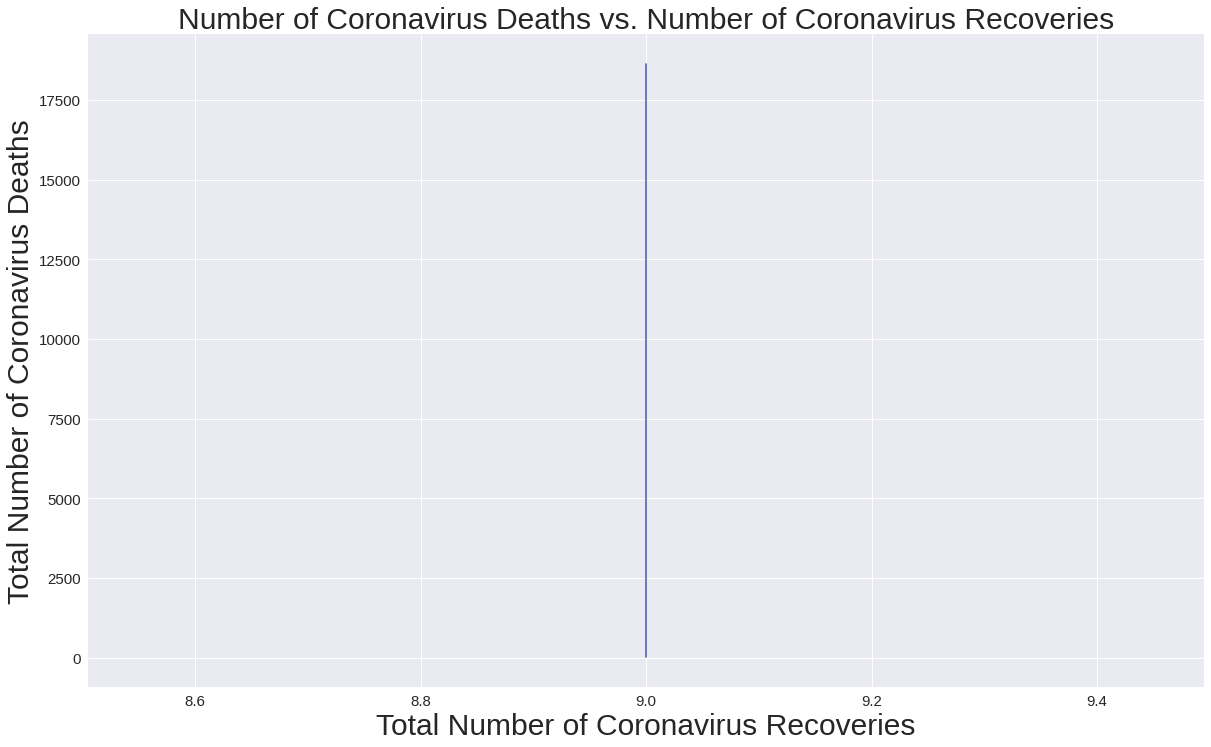

In [277]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Total Number of Coronavirus Recoveries', size=30)
plt.ylabel('Total Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()